# **ND (N-Dimentions Datasets):**

In [9]:
# pip install kneed

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [15]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
def Elbow_Method(data):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=43)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  
  kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
  return kn.knee, wcss


def Ploting_Elbow_graph(x, y):
  plt.figure(figsize=(13,5))
  plt.plot(x, y)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [17]:
k_points, wcss = Elbow_Method(data)
k_points

3

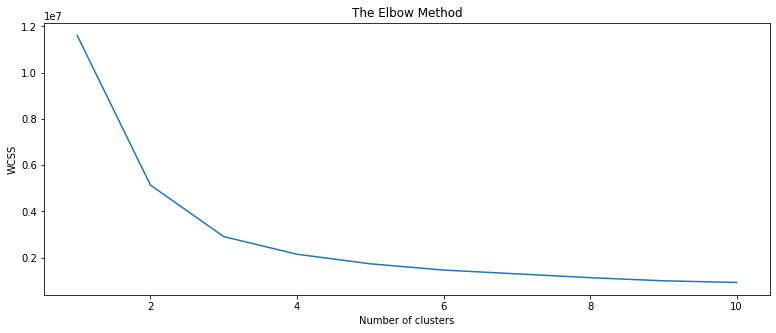

In [18]:
Ploting_Elbow_graph(x=range(1,11), y=wcss)

In [24]:
kmeans = KMeans(n_clusters = k_points, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[0 0 0 2 2 0 2 0 1 0 0 0 0 1 2 0 2 0 2 2 2 0 0 0 2 2 0 2 2 0 0 2 0 0 0 2 0
 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 2 0 0 0 2 0 0 0 0 0 2 2 2 0 2
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2
 1 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 2 2 0 2 0 2 0 0 2 0 2 0 1 0 0 0 0 1 0 0 2
 0 0 2 0 2 1 0 0 2 2 0 2 0 2 1 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 2 0 0 0
 0 1 0 2 2 0 2 0 0 0 2 0 0 2 1 0 0 0 0 2 0 1 0 2 0 0 0 0 2 2 2 2 2 0 0 1 0
 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 2 0 2 2 0 0 1 1 0 0 0 0 0 2 0 0 0 1
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 0 2 1 2 0 0 0 0 2 2 0 2
 1 2 2 0 0 2 0 0 0 2 2 2 2 2 0 2 2 2 0 2 0 0 2 0 2 0 0 0 0 2 2 0 2 0 0 0 0
 0 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0 0 1 2 0 0 0 2
 1 2 0 2 2 1 2 0 0 0 2 0 2 0 2 0 0 0 1 0 2 0 1 2 0 2 2 0 0 0 0 0 2 0 0 2 0
 0 0 1 0 2 1 0 2 1 0 0 0 2 2 0 0 0 2 1 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 2 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 2 2 0 0 1
 0 0 2 0 2 1 2 0 0 0 0 0 

In [25]:
# Mentioned the label:

data['Cluster_Label'] = y_kmeans

In [26]:
# find the data points whnich is belong the cluster 0:
data[y_kmeans==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster_Label
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
5,5,116,74,0,0,25.6,0.201,30,0,0
7,10,115,0,0,0,35.3,0.134,29,0,0


In [27]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster_Label
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,2
5,5,116,74,0,0,25.6,0.201,30,0,0
6,3,78,50,32,88,31.0,0.248,26,1,2
7,10,115,0,0,0,35.3,0.134,29,0,0
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,1,0


In [29]:
# Filter the clusters:

def Filter_Cluster_Data(data):
  for i in data['Cluster_Label'].unique():
    cluster_data = data[data['Cluster_Label'] == i]
    # cluster_data = cluster_data.drop('Cluster_Label', 1) # after get the cluster data you can split the data for ML model creation
    print(cluster_data.head(3))

Filter_Cluster_Data(data)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  Cluster_Label  
0                     0.627   50        1              0  
1                     0.351   31        0              0  
2                     0.672   32        1              0  
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  Cluster_Label  
3                     0.167   21        0              2  
4                     2.288   33        1              2  
6        